In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy.stats
from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

plt.rcParams['figure.figsize'] = [5, 5]
%config InlineBackend.figure_format='retina'

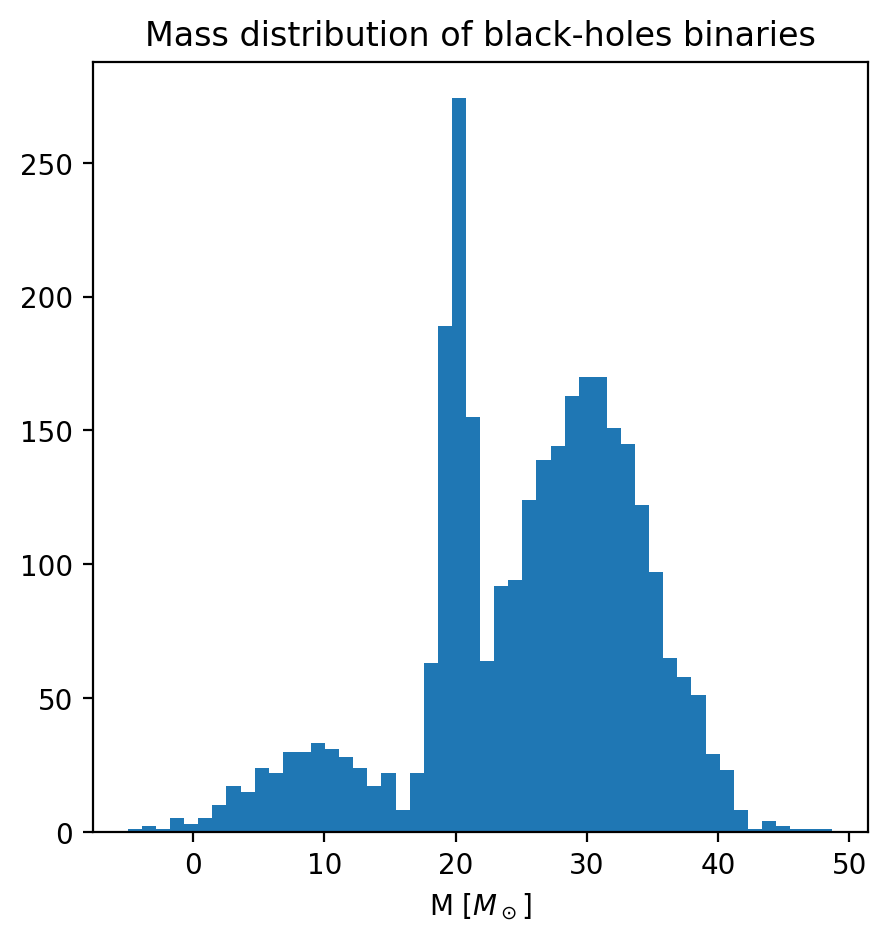

In [3]:
data = np.load('formationchannels.npy')
plt.hist(data, bins=50)
plt.title('Mass distribution of black-holes binaries')
plt.xlabel('M $[M_\odot]$')
plt.show()

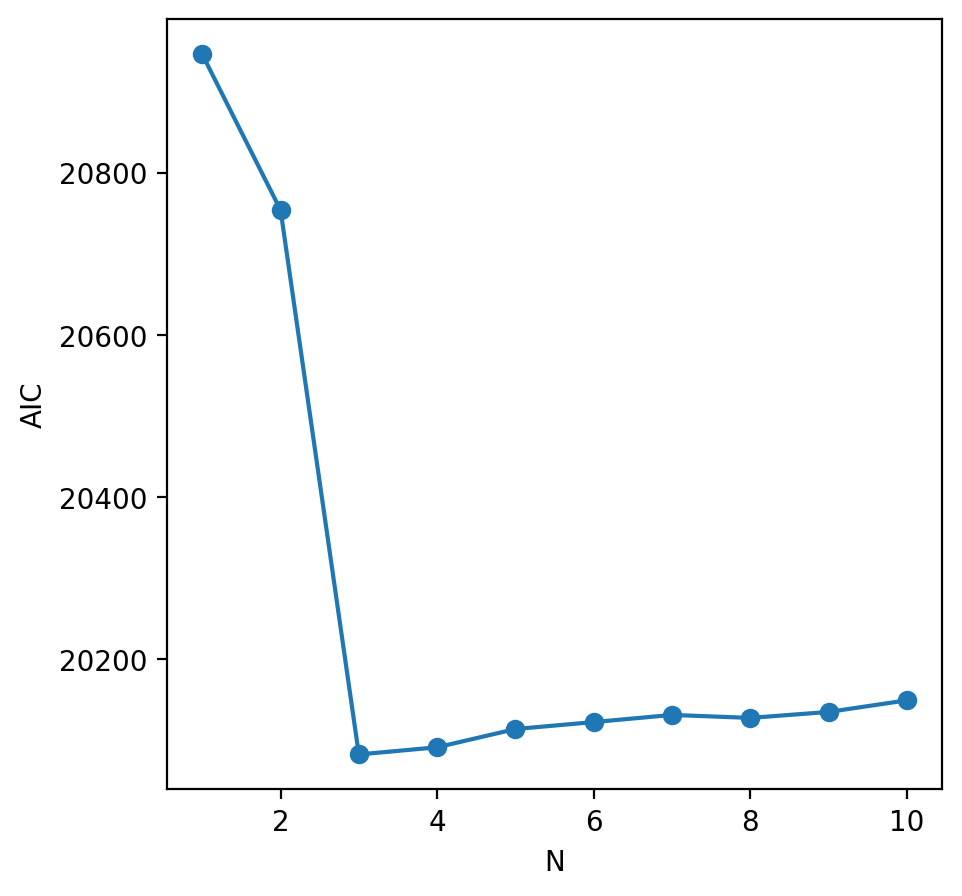

The best number of components is : 3


In [4]:
N = np.arange(1,11)
gmm = [GaussianMixture(n, random_state=0).fit(data) for n in N]
mean = [model.means_ for model in gmm] #this returns the values of mu for each gaussian
aic = [model.aic(data) for model in gmm]

plt.plot(N, aic, 'o-')
plt.xlabel('N')
plt.ylabel('AIC')
plt.show()

best_N = N[np.argmin(aic)]
print('The best number of components is :', best_N)

# Actually it can happen that the best N results in 4 components because the AIC for N=3 is incredibly high
# This is due to the fact that GaussianMixture is a multidimensional maximization algorithm, but a multidimensional
# maximization is an unsolved problem in math. It starts from an initial guess to find the absolute maximum,
# but if this guess is unlucky the code will not converge.
# By running the code multiple times, I tried different initial guesses and it shows that best_N=4 case is
# a rare result so it may be cause by an unlucky initial guess

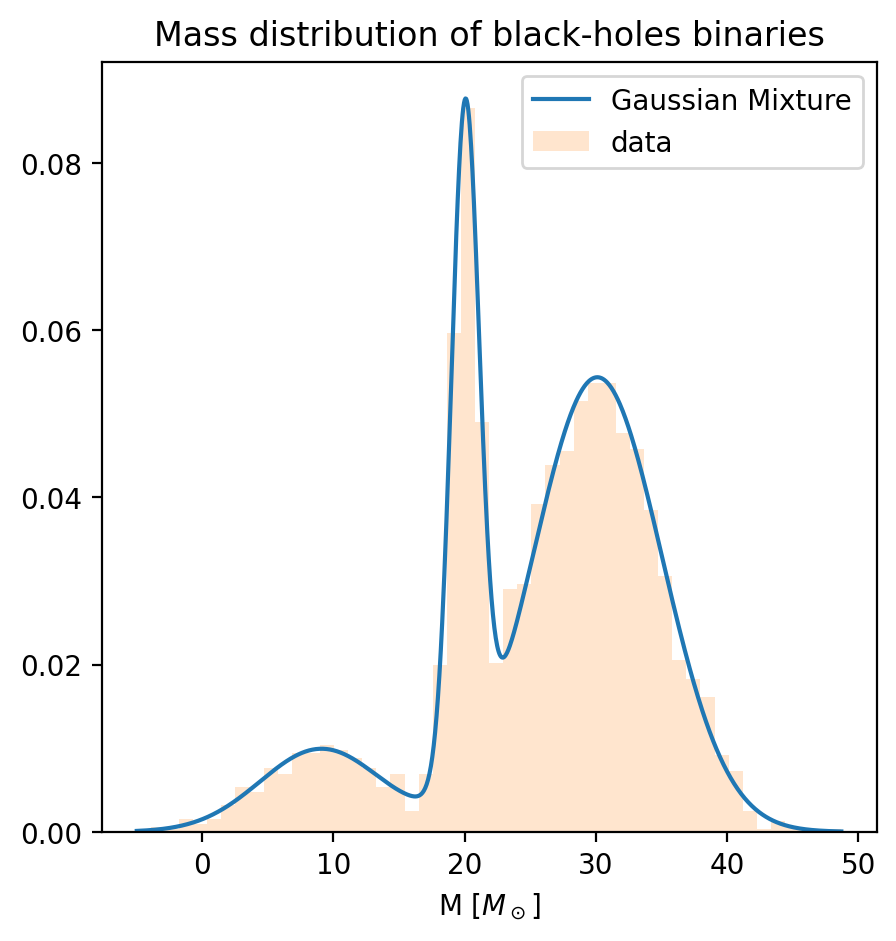

In [5]:
best_gmm = GaussianMixture(best_N, random_state=0).fit(data)
x = np.linspace(np.min(data),np.max(data),1000)

logprob = best_gmm.score_samples(x.reshape(-1,1))
pdf = np.exp(logprob)
plt.plot(x, pdf, label='Gaussian Mixture')
plt.hist(data, 50, density=True, alpha=0.2, label='data')
plt.title('Mass distribution of black-holes binaries')
plt.xlabel('M $[M_\odot]$')
plt.legend()
plt.show()

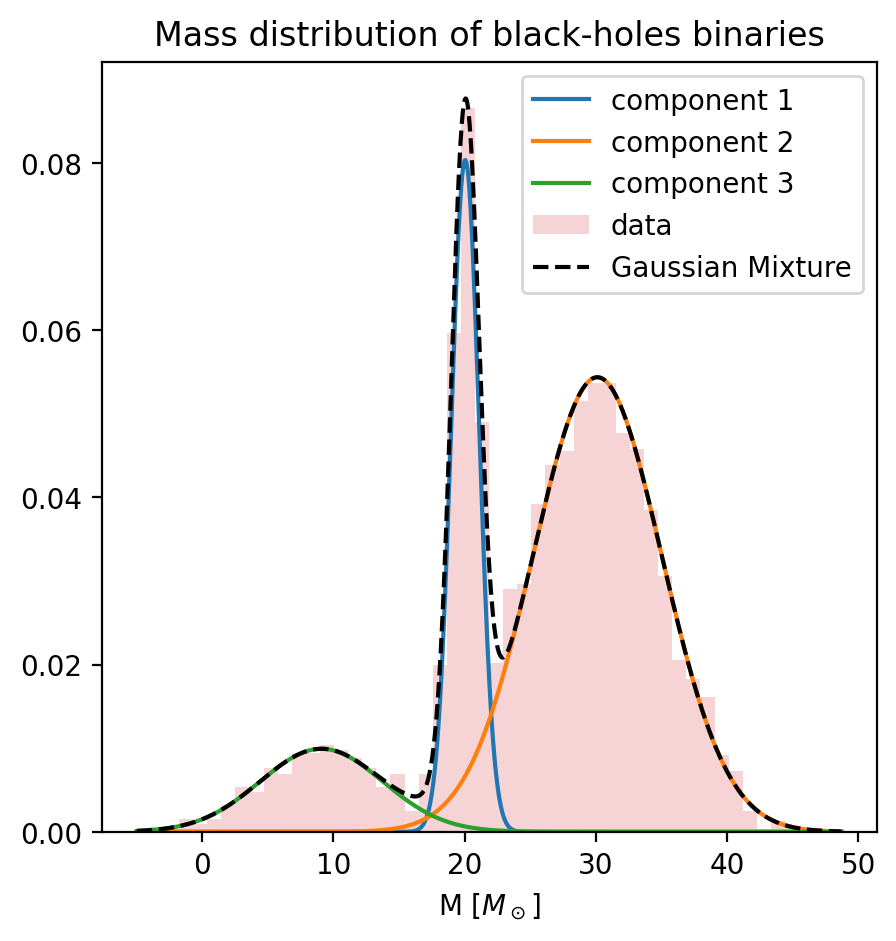

In [6]:
densities = best_gmm.predict_proba(x.reshape(-1,1))
sing_pdf = densities*pdf.reshape(-1,1)

for i in range(best_N):
    plt.plot(x, sing_pdf[:,i],linestyle='-', label='component %i' %(i+1))

plt.hist(data, 50, density=True, alpha=0.2, label='data')
plt.plot(x, pdf, label='Gaussian Mixture', color='black',linestyle='--')
plt.title('Mass distribution of black-holes binaries')
plt.xlabel('M $[M_\odot]$')
plt.legend()
plt.show()

### 4 components
The result is quite the same as the previous one, so the 3-component model is preferred following Occam's Razor

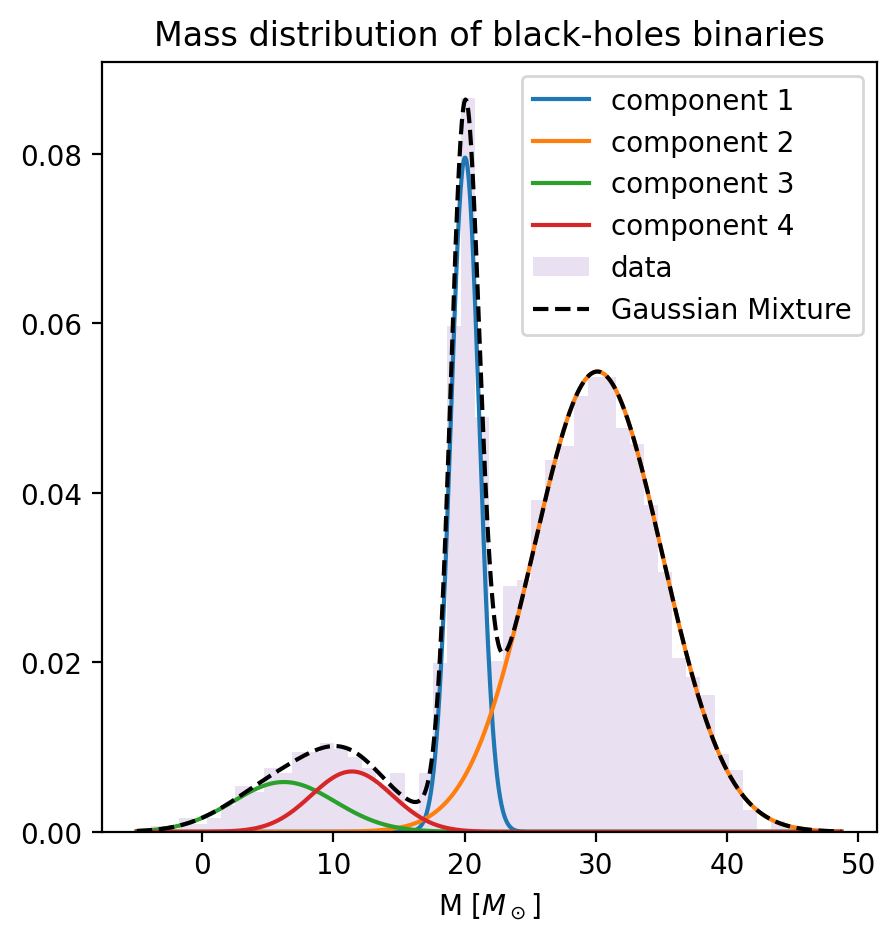

In [7]:
gmm4= GaussianMixture(4, random_state=0).fit(data)
x = np.linspace(np.min(data),np.max(data),1000)
 
pdf4 = np.exp(gmm4.score_samples(x.reshape(-1,1)))
densities4 = gmm4.predict_proba(x.reshape(-1,1))
sing_pdf4 = densities4*pdf4.reshape(-1,1)

for i in range(4):
    plt.plot(x, sing_pdf4[:,i],linestyle='-', label='component %i' %(i+1))

plt.hist(data, 50, density=True, alpha=0.2, label='data')
plt.plot(x, pdf4, label='Gaussian Mixture', color='black',linestyle='--')
plt.title('Mass distribution of black-holes binaries')
plt.xlabel('M $[M_\odot]$')
plt.legend()
plt.show()